<a href="https://ibb.co/FW1ZZYW"><img src="https://i.ibb.co/X4P0054/cardiovasculardisease.jpg" alt="cardiovasculardisease" width="1000"></a>

# Cardio Disease Classification

# Notebook 3 - classification:

### Content:
Features:

age | int (days)  
height | int (cm)   
weight | float (kg)   
gender | categorical code   
Systolic | ap_hi | int   
Diastolic | ap_lo | int   
Cholesterol |  1: normal, 2: above normal, 3: well above normal   
Glucose | 1: normal, 2: above normal, 3: well above normal   
Smoking | binary   
Alcohol intake | binary   
Physical activity | binary   
Presence or absence of cardiovascular disease |binary   
## to get the most from our data we will make 2 more features wich will be explained later. 


kaggle link - https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## Imports and read form csv:

In [1]:
# Basic imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# preprocessing and split
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scores and reports
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
df = pd.read_csv('data/data.csv')

# Warning ignor
import warnings
warnings.filterwarnings('ignore')

## Basic info:

In [2]:
df.shape

(70000, 14)

In [3]:
df.head()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,id,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age_days     70000 non-null  int64  
 2   age_year     70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [6]:
df.isna().sum()

id             0
age_days       0
age_year       0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

There are no null values!  
And all the values are numeric.

## Preproces Data:

### Clean the data

#### We can see that there are some unnecessary columns, so we can throw them

In [7]:
# Drop id col
df.drop(['id'], axis = 1, inplace= True)
# Round float
df['age_year'] = df['age_year'].round(0)
df['weight'] = df['weight'].round(0)
# There are some errors in the data ap_hi always biger then ap_lo 
# lats drop this errors:
df = df[df['ap_lo']<df['ap_hi']]

df.reset_index()

,index,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68759,69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
68760,69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
68761,69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
68762,69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
df

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,61.0,1,163,72.0,135,80,1,2,0,0,0,1


### Add features

#### BMI - 
```"BMI is a convenient rule of thumb used to broadly categorize a person as underweight, normal weight, overweight, or obese based on tissue mass (muscle, fat, and bone) and height." - wikipedia```

<a href="https://ibb.co/t3K5F8Q"><img src="https://i.ibb.co/V39852J/BMI.png" alt="BMI" border="0"></a>

In [9]:
# add BMI:
df['BMI'] = (df["weight"] / (df["height"]/100)**2).astype(np.int)

#### MAP - 
```"The mean arterial pressure (MAP) is an average blood pressure in an individual during a single cardiac cycle." - wikipedia```

<a href="https://ibb.co/ZcfFBmF"><img src="https://i.ibb.co/CVwYb2Y/arterial-pressure-pulse-profile.png" alt="arterial-pressure-pulse-profile" border="0"></a>

In [10]:
# add MAP:
df['MAP'] = (((df["ap_lo"]*2) + df["ap_hi"])/3).round(0)

Our new dataframe:

In [11]:
df.head()

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,18393,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21,90.0
1,20228,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34,107.0
2,18857,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23,90.0
3,17623,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28,117.0
4,17474,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23,73.0


## Visualization:

### Lets see how the data split between the class

In [12]:
sns.countplot(df['cardio']) # count the number of patients with or witout cardio.

<AxesSubplot:xlabel='cardio', ylabel='count'>

### The number of patients is divided almost equally!

### Now lats correlation between features:

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

### At first glance we can't find strong correlation between features

## Lets test every featur by itself:

In [14]:
f, axes = plt.subplots(1, 6, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gluc',data=df,hue='cardio' , ax=axes[0])
sns.countplot(x='gender',data=df,hue='cardio', ax=axes[1] )
sns.countplot(x='alco',data=df,hue='cardio' , ax=axes[2])
sns.countplot(x='smoke',data=df,hue='cardio' , ax=axes[3])
sns.countplot(x='cholesterol',data=df,hue='cardio', ax=axes[4])
sns.countplot(x='active',data=df,hue='cardio' , ax=axes[5])


<AxesSubplot:xlabel='active', ylabel='count'>

We can see that our intuition is pretty good apart from the smoking and alcohol that behave differently than expected.

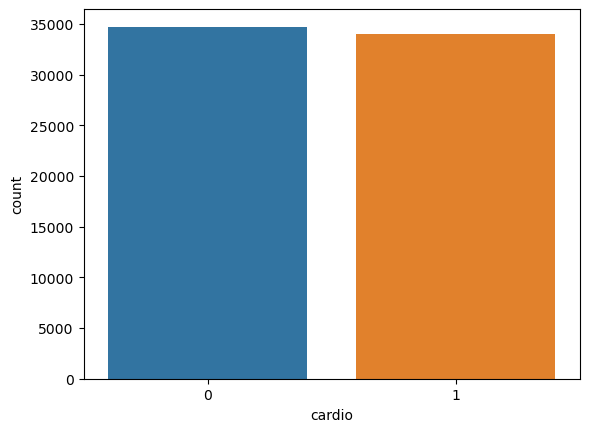

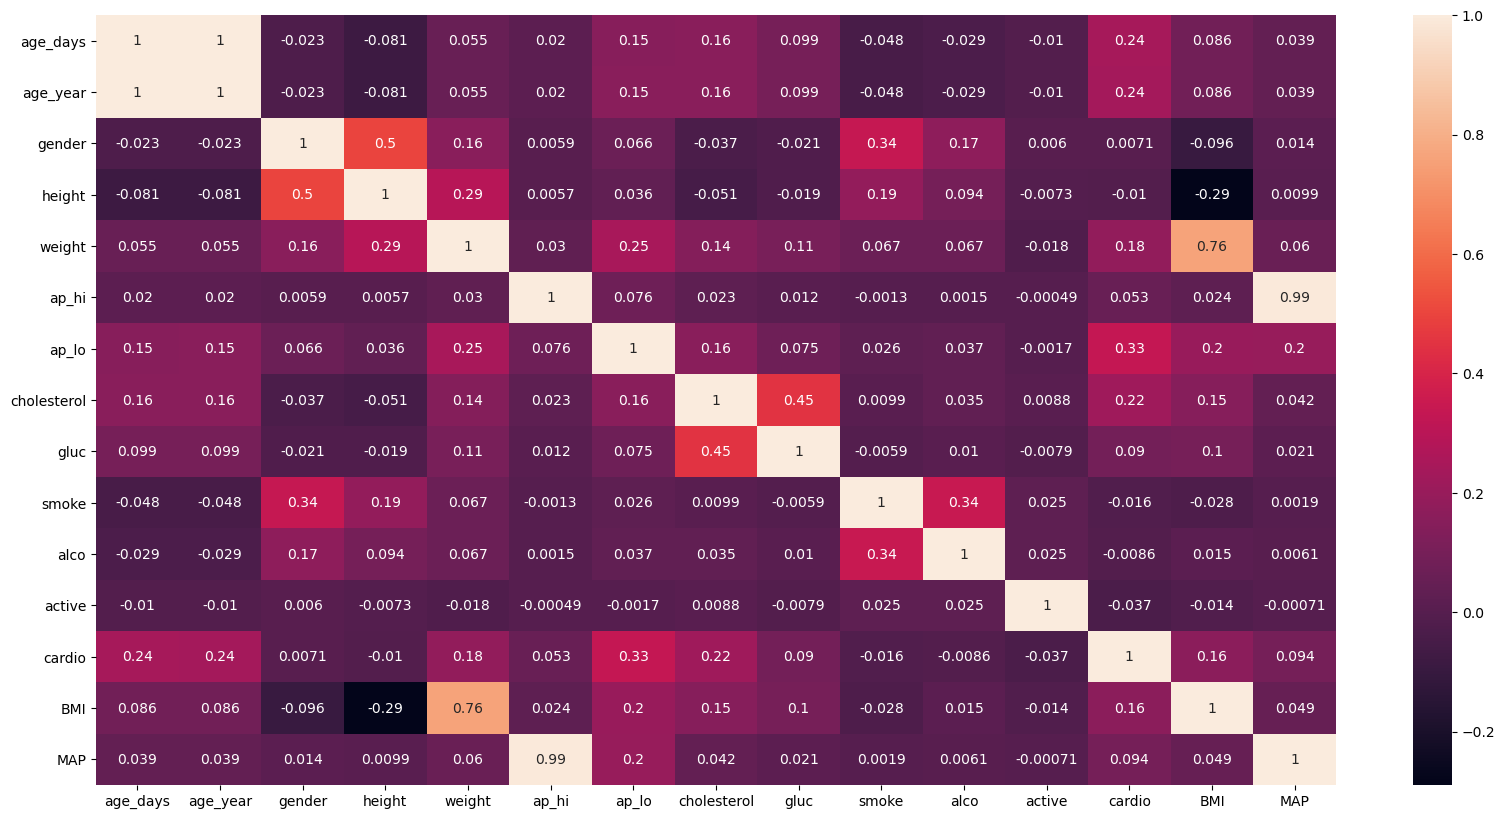

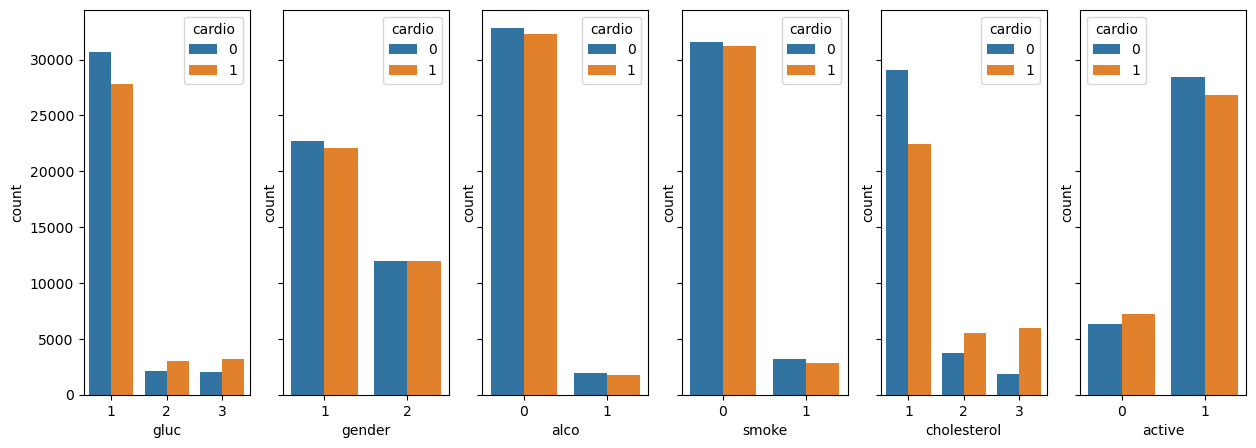

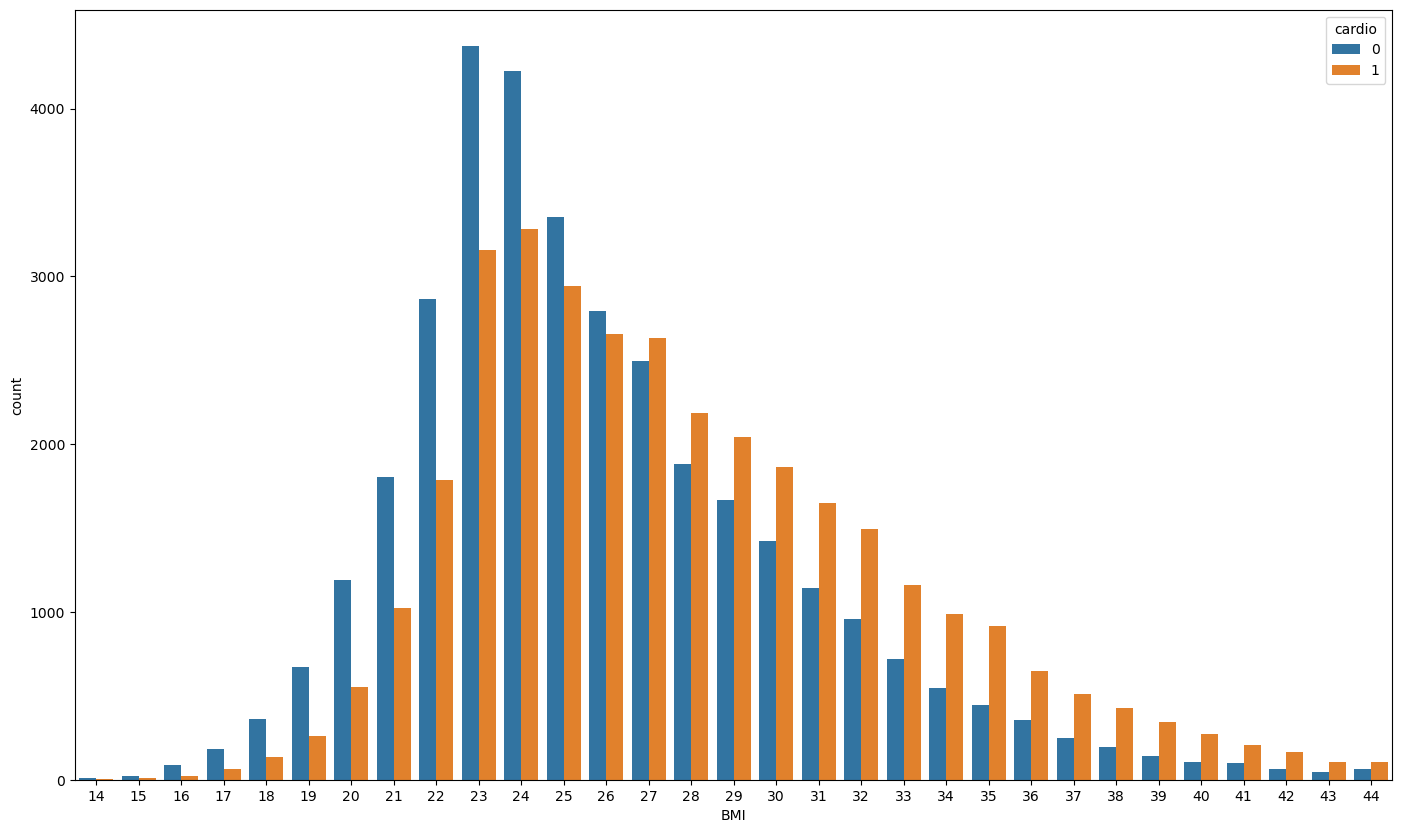

In [15]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['BMI'] < 45) & (df['BMI'] > 13) ], x='BMI', hue='cardio')
plt.show()

 It can be seen that as the BMI increases the number of cardio increases

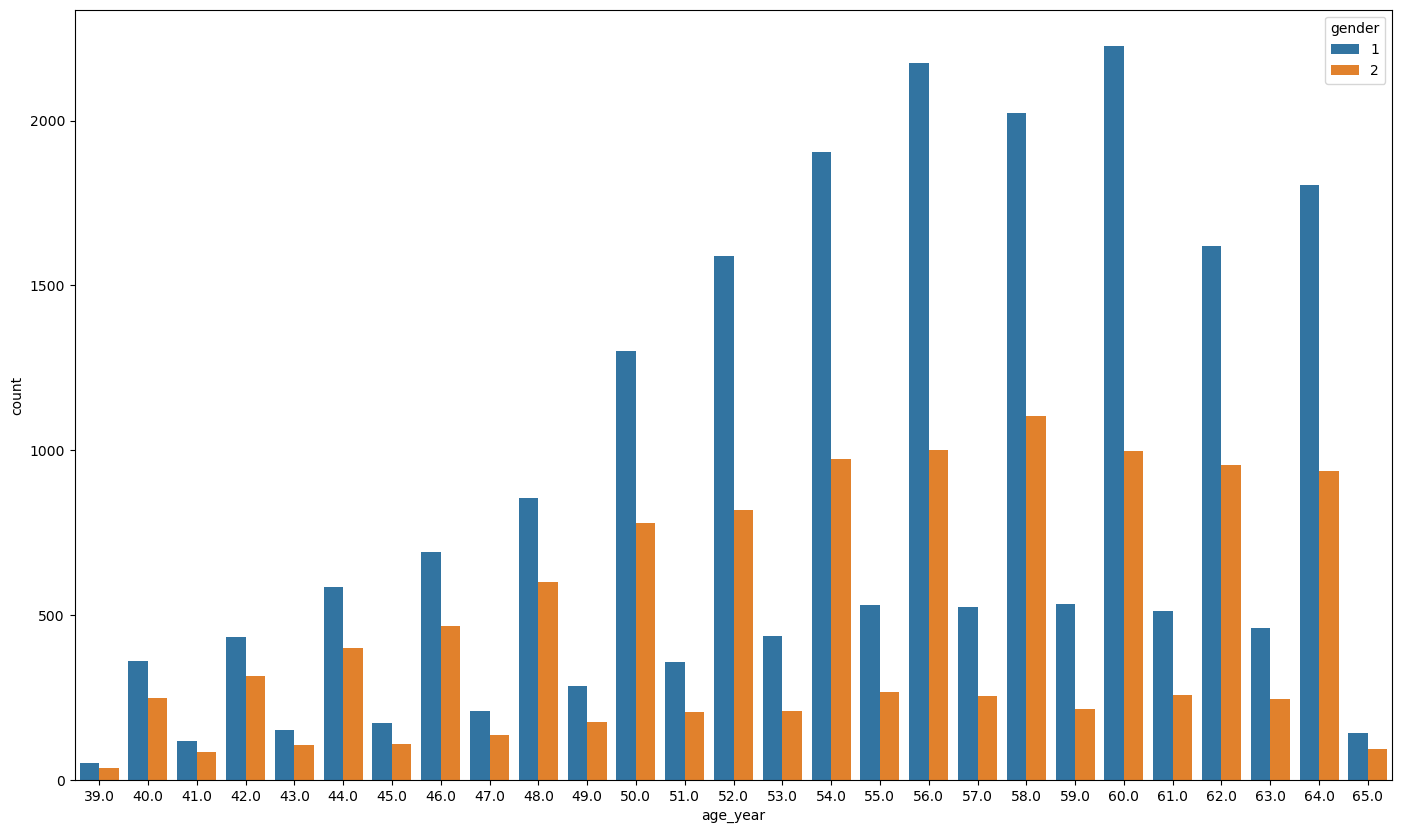

In [16]:
plt.figure(figsize=(17,10))
sns.countplot(data = df[(df['cardio'] == 1)], x='age_year' ,hue='gender')
plt.show()

It can be seen that as age increases there are more cardio disease. and men are sicker than women and at an earlier age.

Now we can drop 'age_year' because it's less specific from 'age_days'

In [17]:
df.drop(['age_year'], axis = 1, inplace= True)

## Models:

In [18]:
# Split Data
y = df['cardio']
x = df.drop(['cardio'], axis =1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(x,y ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=x.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=x.columns)
scal_x = pd.DataFrame(StandardScaler().fit(x).transform(x),columns=x.columns)

## searching for optimal value of K for knn, with Cross validation score (I will explain later what Cross validation is):

In [19]:
k_range = [10,50,100,200]
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    Optional_K = cross_val_score(knn, scal_x, y, cv=10)
    k_scores.append(Optional_K.mean())
    print('.')
print(k_scores)

.
.
.
.
[0.6867110529292954, 0.7029549540107345, 0.7030858863586821, 0.701951579922215]


In [20]:
plt.plot(k_range, k_scores)
plt.xlabel('K for knn')
plt.ylabel('Cross validated score')

Text(0, 0.5, 'Cross validated score')

K = 100 is optimal!

## Modeling: 

In [21]:
KNN = KNeighborsClassifier(n_neighbors=100).fit(scal_x_train, y_train)
LR = LogisticRegression().fit(scal_x_train, y_train)
Dummy = DummyClassifier(strategy='most_frequent').fit(scal_x_train, y_train)

### Lats test our models:

In [22]:
# Simpel score test:
print("KNeighborsClassifier mean accuracy: {:.2f}%".format(KNN.score(scal_x_test, y_test)*100))
print("LogisticRegression mean accuracy: {:.2f}%".format(LR.score(scal_x_test, y_test)*100))
print("DummyClassifier mean accuracy: {:.2f}%".format(Dummy.score(scal_x_test, y_test)*100))


KNeighborsClassifier mean accuracy: 70.41%
LogisticRegression mean accuracy: 71.95%
DummyClassifier mean accuracy: 50.83%


In [23]:
# List of all model and there names:
model = [(Dummy, "DummyClassifier"), (LR, "LogisticRegression"),(KNN, "KNeighborsClassifier")]

### Cross validation score:

<a href="https://ibb.co/TLZb4Lm"><img src="https://i.ibb.co/Zm3YBmW/2021-03-14-18-22-49.png" alt="2021-03-14-18-22-49" border="0"></a>

Taken from: ```https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb```

In [24]:
for i,j in model:
    cv_score = cross_val_score(i, scal_x, y, cv=10)
    print(j, "cross val score is:", cv_score.mean())

DummyClassifier cross val score is: 0.5052352975659817
LogisticRegression cross val score is: 0.7215257935858397
KNeighborsClassifier cross val score is: 0.7030858863586821


### classification report and confusion matrix:

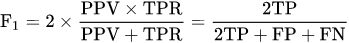

DummyClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      6990
           1       0.00      0.00      0.00      6763

    accuracy                           0.51     13753
   macro avg       0.25      0.50      0.34     13753
weighted avg       0.26      0.51      0.34     13753



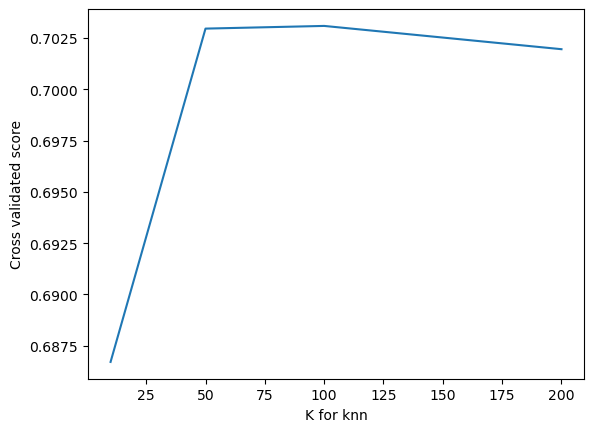

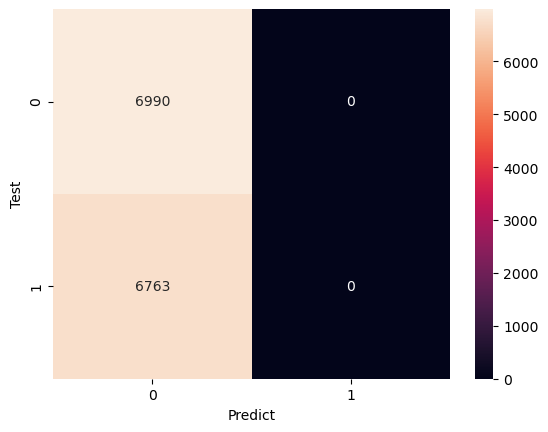

LogisticRegression  Classification Report
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      6990
           1       0.74      0.67      0.70      6763

    accuracy                           0.72     13753
   macro avg       0.72      0.72      0.72     13753
weighted avg       0.72      0.72      0.72     13753



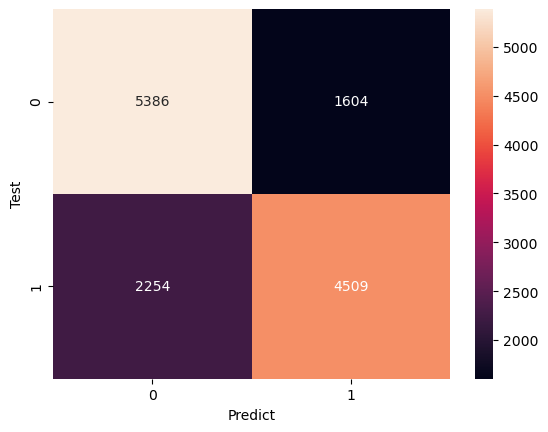

KNeighborsClassifier  Classification Report
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      6990
           1       0.72      0.65      0.68      6763

    accuracy                           0.70     13753
   macro avg       0.71      0.70      0.70     13753
weighted avg       0.71      0.70      0.70     13753



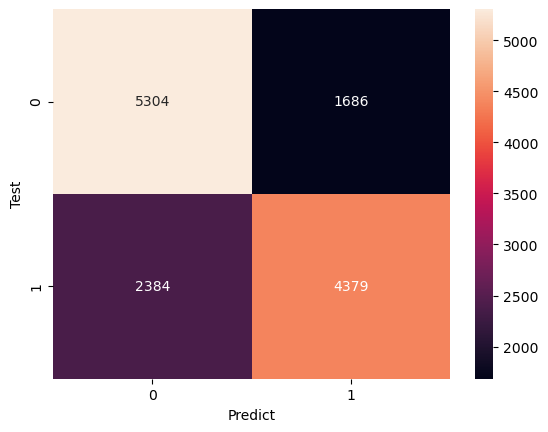

In [25]:
for i , j in model:
    train_pred = i.predict(scal_x_train)
    y_pred = i.predict(scal_x_test)

    
    print( j,' Classification Report')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.subplots()
    sns.heatmap(cm,fmt=".0f", annot=True)
    plt.xlabel("Predict")
    plt.ylabel("Test")
    plt.show()

## ROC curve and AUC:

### The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
### The larger the area under the curve (AUC) the better!

$$\text{TPR} = \frac{TP}{TP + FN}$$  
$$\text{FPR} = \frac{FP}{TN + FP}$$  
$$\mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}$$

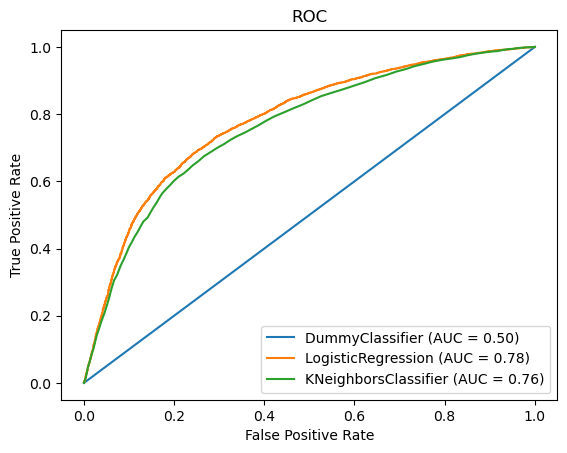

In [26]:
#ROC curves
plot = plt.subplot(title = 'ROC')
plot_roc_curve(Dummy,scal_x_test, y_test, ax = plot, name= 'DummyClassifier')
plot_roc_curve(LR,scal_x_test, y_test, ax = plot, name= 'LogisticRegression')
plot_roc_curve(KNN,scal_x_test, y_test, ax = plot, name= 'KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Logistic Regression model is the best for this case

# semester b:

## improving the model:

### we will try to improv by using Ensmbel models 

### Boosting is an ensemble technique that attempts to create a strong classifier from a number of weak classifiers.

Weak models are added sequentially, trained using the weighted training data.
The process continues until a pre-set number of weak learners have been created (a user parameter) or no further improvement can be made on the training dataset.
Once completed, you are left with a pool of weak learners each with a stage value.
Predictions are made by calculating the weighted average of the weak classifiers.

## AdaBoost

AdaBoost, short for Adaptive Boosting. AdaBoost is begun by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

## RandomForest

A random forest algorithm consists of many decision trees. The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

## XGBoost

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework, tend to outperform all other algorithms. However, when it comes to small data, decision tree based algorithms are considered best in class right now.

<a href="https://ibb.co/2y62yGp"><img src="https://i.ibb.co/Xb4BbcG/1-QJZ6-W-Pck-W7-Rl-IDw-UIN9-Q.jpg" alt="1-QJZ6-W-Pck-W7-Rl-IDw-UIN9-Q" border="0"></a>

---
NOTE  
Taken from: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d


In [27]:
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(scal_x_train, y_train)
print("DecisionTreeClassifier mean accuracy: {:.2f}%".format(DT.score(scal_x_test, y_test)*100))

DecisionTreeClassifier mean accuracy: 70.90%


In [28]:
Ada = AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
RF = RandomForestClassifier()
XG = XGBClassifier(n_estimators= 150, n_jobs=-1, learning_rate=0.2, seed=0, eval_metric = 'mlogloss')

In [29]:
XG.fit(scal_x_train, y_train)
print("RandomForest mean accuracy: {:.2f}%".format(XG.score(scal_x_test, y_test)*100))

RandomForest mean accuracy: 72.89%


In [30]:
RF.fit(scal_x_train, y_train)
print("RandomForest mean accuracy: {:.2f}%".format(DT.score(scal_x_test, y_test)*100))

RandomForest mean accuracy: 70.90%


#### Note that DecisionTree alone does not improve the result,
#### And xgboost improves a bit.
#### But with AdaBoost we can improve the mean accuracy by 1.3% !

In [31]:
Ada.fit(scal_x_train, y_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada.score(scal_x_test, y_test)*100))

AdaBoostClassifier mean accuracy: 73.27%


### Now i will try to reduce dimensionality by hand:

In [33]:
# Chacking the importance for etch feature
for n,s in zip(x.columns, Ada.feature_importances_):
    print(n, s)

age_days 0.3173654583887011
gender 0.012575652361079088
height 0.10016331954131745
weight 0.11515872449382313
ap_hi 0.13182779812141407
ap_lo 0.04411498760893426
cholesterol 0.05634069839063002
gluc 0.022830895026904295
smoke 0.00824882304039846
alco 0.008816535946287854
active 0.011790519886330368
BMI 0.08282213863632847
MAP 0.08794444855785134


We can see that some features is under 0.05 so we will drop tham:

In [34]:
df1 = df.drop(['smoke','alco','active','gender','gluc','ap_lo' ], axis = 1)
df1

,age_days,height,weight,ap_hi,cholesterol,cardio,BMI,MAP
0,18393,168,62.0,110,1,0,21,90.0
1,20228,156,85.0,140,3,1,34,107.0
2,18857,165,64.0,130,3,1,23,90.0
3,17623,169,82.0,150,1,1,28,117.0
4,17474,156,56.0,100,1,0,23,73.0
...,...,...,...,...,...,...,...,...
69995,19240,168,76.0,120,1,0,26,93.0
69996,22601,158,126.0,140,2,1,50,107.0
69997,19066,183,105.0,180,3,1,31,120.0
69998,22431,163,72.0,135,1,1,27,98.0


### Lats try to fit the new Data Frame with the same model:

In [35]:
# Split Data
y1 = df1['cardio']
x1 = df1.drop(['cardio'], axis =1)

#split x and y to trin and test
x1_train , x1_test , y1_train , y1_test = split(x1,y1 ,train_size = 0.8 , shuffle = True , random_state = 1)

#scal data
scal_x1_train = pd.DataFrame(StandardScaler().fit(x1_train).transform(x1_train),columns=x1.columns)
scal_x1_test = pd.DataFrame(StandardScaler().fit(x1_train).transform(x1_test),columns=x1.columns)
scal_x1 = pd.DataFrame(StandardScaler().fit(x1).transform(x1),columns=x1.columns)

In [36]:
Ada_= AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
Ada_.fit(scal_x1_train, y1_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada_.score(scal_x1_test, y1_test)*100))

AdaBoostClassifier mean accuracy: 72.77%


## we can see that the result is still Better from the first model(Logistic Regression) with almost half of the features!!

# Now lats use PCA 

In [37]:
from sklearn.decomposition import PCA

In [38]:
# Split Data
y2 = df['cardio']
x2 = df.drop(['cardio'], axis =1)
col = x2.columns
x2 = StandardScaler().fit_transform(x2)
pd.DataFrame(data = x2, columns = col)


,age_days,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,MAP
0,-0.433968,1.366936,0.444443,-0.845292,-0.121393,-0.128458,-0.537162,-0.394760,-0.310399,-0.237376,0.494591,-0.992054,-0.133197
1,0.309472,-0.731563,-1.020653,0.759645,0.071903,0.903143,2.408877,-0.394760,-0.310399,-0.237376,0.494591,1.146842,0.189765
2,-0.245981,-0.731563,0.078169,-0.705732,0.007471,-1.160059,2.408877,-0.394760,-0.310399,-0.237376,-2.021874,-0.662993,-0.133197
3,-0.745929,1.366936,0.566534,0.550306,0.136335,1.934743,-0.537162,-0.394760,-0.310399,-0.237376,0.494591,0.159659,0.379743
4,-0.806295,-0.731563,-1.020653,-1.263972,-0.185825,-2.191659,-0.537162,-0.394760,-0.310399,-0.237376,-2.021874,-0.662993,-0.456158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68759,-0.090811,1.366936,0.444443,0.131626,-0.056961,-0.128458,-0.537162,-0.394760,3.221664,-0.237376,0.494591,-0.169402,-0.076203
68760,1.270879,-0.731563,-0.776470,3.620621,0.071903,0.903143,0.935857,1.355193,-0.310399,-0.237376,0.494591,3.779329,0.189765
68761,-0.161306,1.366936,2.275812,2.155243,0.329631,0.903143,2.408877,-0.394760,-0.310399,4.212719,-2.021874,0.653250,0.436736
68762,1.202004,-0.731563,-0.166014,-0.147493,0.039687,-0.128458,-0.537162,1.355193,-0.310399,-0.237376,-2.021874,-0.004872,0.018785


In [39]:
x2_train , x2_test , y2_train , y2_test = split(x2,y2 ,train_size = 0.8 , shuffle = True , random_state = 1)

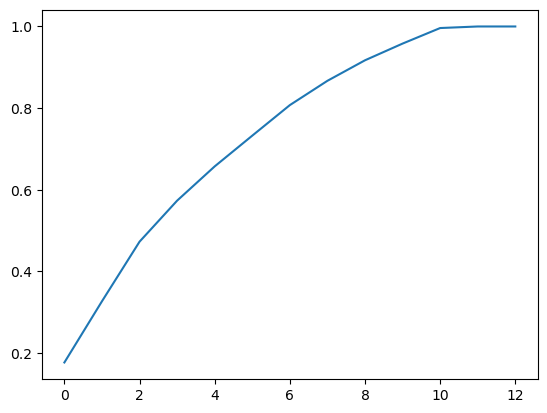

In [40]:
pca1 = PCA()
pca1.fit(x2_train)
cumsum = np.cumsum(pca1.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

In [41]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x2_train)
print(type(principalComponents))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3','4','5','6','7','8','9','10'])
x2_test1 = pca.transform(x2_test)
principalDf

<class 'numpy.ndarray'>


,1,2,3,4,5,6,7,8,9,10
0,0.175220,0.520600,-1.286846,0.364403,0.455735,-1.171175,-1.279967,-0.063666,0.127494,0.360231
1,0.031746,-0.003258,-0.802591,0.624804,-0.907945,1.053062,-1.913795,0.923883,-0.332334,0.044454
2,-0.990084,0.054441,0.829569,-1.016451,-0.730010,-0.540681,0.302593,2.309547,-0.139993,-1.087253
3,-0.583820,0.632023,1.092513,-0.405334,-1.549127,0.910035,-1.870711,0.452564,0.026733,0.166361
4,1.492743,-1.274726,-2.290964,0.310821,0.735044,0.258208,1.316262,-0.823218,0.386187,0.412060
...,...,...,...,...,...,...,...,...,...,...
55006,0.689654,-0.976003,-1.866997,-1.616890,-0.773768,2.027556,-0.183087,0.161094,-0.022606,-0.899885
55007,-1.506199,2.201204,-0.543574,-0.411324,0.919139,-0.257294,-0.086483,0.457912,0.254915,0.099009
55008,0.881170,-1.215824,-2.291141,-1.396548,-0.568866,1.996238,-0.357482,0.405621,0.098398,-0.838338
55009,-0.197261,-0.641718,1.069237,-2.005040,-1.571398,-0.983794,0.092857,1.649812,-0.496510,-2.145951


In [42]:
Ada = AdaBoostClassifier(
    DT,n_estimators=220,algorithm="SAMME.R",learning_rate=0.37
    )
Ada.fit(principalComponents, y2_train)
print("AdaBoostClassifier mean accuracy: {:.2f}%".format(Ada.score(x2_test1, y2_test)*100))

AdaBoostClassifier mean accuracy: 71.84%


### This time PCA did not work so well for us...

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6990
           1       0.75      0.68      0.71      6763

    accuracy                           0.73     13753
   macro avg       0.73      0.73      0.73     13753
weighted avg       0.73      0.73      0.73     13753



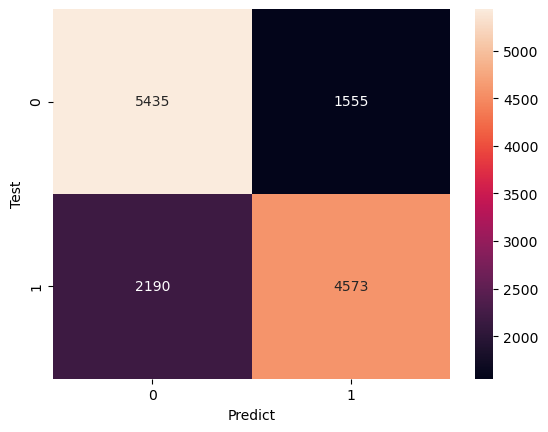

In [44]:
y_pred = Ada_.predict(scal_x1_test)   
print( 'Classification Report')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.subplots()
sns.heatmap(cm,fmt=".0f", annot=True)
plt.xlabel("Predict")
plt.ylabel("Test")
plt.show()

## To conclude the best result we have reached is 72.77% percent with only 8 features compared to the 14 we had at the beginning. we get this result by manually looking for the least important features and remove them.